**Проект предназначен для автоматизации выполнения курсового домашнего задания по дисциплине "Теория вероятности и математическая статистика"**

В list_number помещается выборка из вашего вырианта, далее в автоматическом режиме расчитываются диапазоны корзин для построения гистограммы, выводятся все необходимые таблицы и результаты статистического теста

## Часть 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# экспериментальная выборка
list_number = [381, 421, 372, 418, 392, 427, 385, 358, 370, 412, 411, 385, 395, 382, 376, 380, 383, 395, 391,
               430, 391, 377, 372, 406, 429, 429, 376, 431, 405, 430, 382, 429, 413, 421, 395, 413, 430 , 373,
               393, 375, 364, 449, 382, 375, 371, 411, 427, 362, 388, 409, 400, 392, 378, 421, 399, 395, 384, 
               373, 391, 348, 410, 428, 382, 418, 398, 378, 412, 418, 440, 403, 389, 397, 365, 399, 418, 400, 
               402, 405, 410, 423, 373, 409, 390, 432, 394, 369,429,440, 389, 399, 351, 384, 425, 407, 383, 
               415,418, 456, 363, 388, 422, 425, 383, 400, 404, 418, 420, 398, 388, 421, 437, 418, 376, 383, 
               347, 428, 388, 398, 433, 380, 416, 384, 410, 363, 429, 395 ] 

In [3]:
vector = pd.Series(list_number)
n = len(vector)
n

126

Вычисление оптимальной величины интервала группировки

In [4]:
delta_x = vector.max() - vector.min() 
delta_x
g = 10 # меняем число классов                                                     
h = round(delta_x/g) # шаг 
h

11

Построение таблицы частот

In [5]:
x1 = vector.min() - 0.5  
x2 = x1 + h
x1_list = []
x2_list = []
interval_list = [] # список интервалов
mean_list = [] # список средних для интервалов
rate_list = [] # список частот 
relative_rate_list = [] # список относительных частот
cumulative_rate_list = [] # список накопленных частот
relative_cumulative_rate_list = [] # список накопленных относительных частот 

hist_y_list = [] # значения для оси y в гистограмме

count_all = 0

for i in range(g):
    count = 0
    x1_list.append(x1)
    x2_list.append(x2)
    interval_list.append(f"{x1} - {x2}")
    mean_list.append((x1+x2)/2)
    for j in range(len(vector)):
        if (vector[j] > x1) and (vector[j] < x2):
            count += 1
            count_all +=1
    rate_list.append(count) 
    relative_rate_list.append(count/len(list_number))
    cumulative_rate_list.append(count_all)
    relative_cumulative_rate_list.append(count_all/len(list_number))
    hist_y_list.append(count/h)
    x1 += h
    x2 += h    

Результирующая таблица для части 1

In [6]:
df = pd.DataFrame({"interval": interval_list,"mean": mean_list,
                   "rate": rate_list, "relative_rate": relative_rate_list, 
                   "cumulative_rate": cumulative_rate_list, 
                   "relative_cumulative_rate": relative_cumulative_rate_list}) 
df

,interval,mean,rate,relative_rate,cumulative_rate,relative_cumulative_rate
0,346.5 - 357.5,352.0,3,0.023810,3,0.023810
1,357.5 - 368.5,363.0,6,0.047619,9,0.071429
2,368.5 - 379.5,374.0,16,0.126984,25,0.198413
3,379.5 - 390.5,385.0,23,0.182540,48,0.380952
4,390.5 - 401.5,396.0,22,0.174603,70,0.555556
5,401.5 - 412.5,407.0,16,0.126984,86,0.682540
6,412.5 - 423.5,418.0,18,0.142857,104,0.825397
7,423.5 - 434.5,429.0,17,0.134921,121,0.960317
8,434.5 - 445.5,440.0,3,0.023810,124,0.984127
9,445.5 - 456.5,451.0,2,0.015873,126,1.000000


Графики для части 1

<Axes: xlabel='mean', ylabel='rate'>

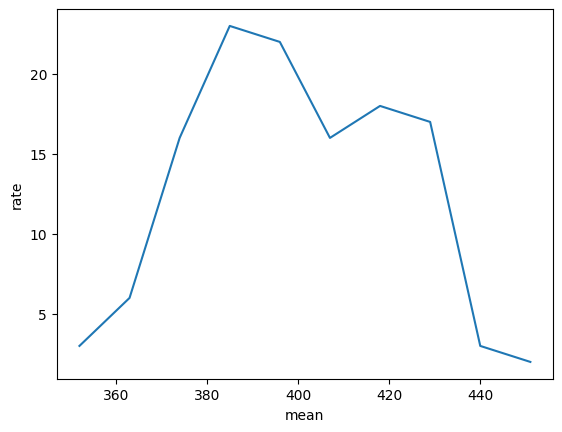

In [7]:
# полигон частот
sns.lineplot(data=df, x="mean", y="rate")

<Axes: xlabel='mean', ylabel='cumulative_rate'>

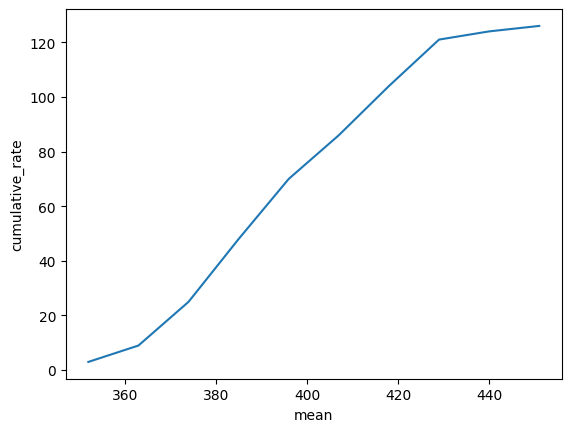

In [8]:
# полигон накопленных частот
sns.lineplot(data=df, x="mean", y="cumulative_rate")

<Axes: xlabel='mean'>

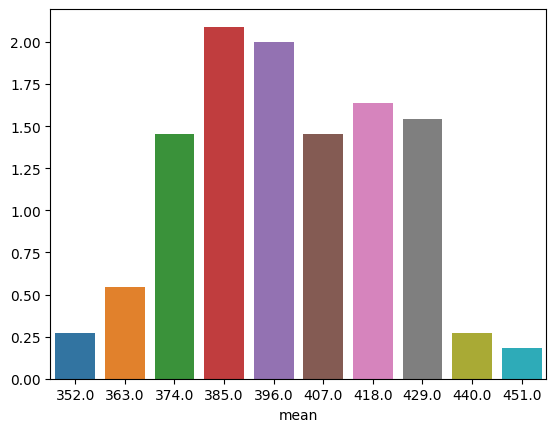

In [9]:
# гистограмма
sns.barplot(data=df, x="mean", y=hist_y_list)

## Часть 2

Вычисление выборочных статистик

In [10]:
mean = vector.mean() # среднее (это реальное среднее выборки для проверки)
mean

399.41269841269843

In [11]:
vector.var() # дисперсия (это реальная дисперсия выборки для проверки)

523.2363174603175

In [12]:
std = vector.std() # среднеквадратическое отклонение (это реальное std выборки для проверки)
std

22.87435938906962

Метод произведений для нахождения выборочных статистик

In [13]:
c = df[df["rate"] == df["rate"].max()]["mean"]
k = h

In [14]:
u_list = []
m_u_list = []
m_u_2_list = []
control_list = []
for i in range(len(mean_list)):
    u_list.append(float((mean_list[i] - c)/k))
    m_u_list.append(u_list[i]*rate_list[i])
    m_u_2_list.append(u_list[i]*u_list[i]*rate_list[i])
    control_list.append((u_list[i]+1)*(u_list[i]+1)*rate_list[i])
df2 = pd.DataFrame({"mean": mean_list, "rate": rate_list, "u": u_list , "m_u": m_u_list, "m_u_2": m_u_2_list, "control": control_list})

In [15]:
# строка итого в таблтце
result_row = []
result_row.append("Итого")
result_row.append(df2["rate"].sum())
result_row.append("-")
result_row.append(df2["m_u"].sum())
result_row.append(df2["m_u_2"].sum())
result_row.append(df2["control"].sum())

Результирующая таблица для части 2

In [16]:
df2.loc[len(df2.index)] = result_row

In [17]:
df2

,mean,rate,u,m_u,m_u_2,control
0,352.0,3,-3.0,-9.0,27.0,12.0
1,363.0,6,-2.0,-12.0,24.0,6.0
2,374.0,16,-1.0,-16.0,16.0,0.0
3,385.0,23,0.0,0.0,0.0,23.0
4,396.0,22,1.0,22.0,22.0,88.0
5,407.0,16,2.0,32.0,64.0,144.0
6,418.0,18,3.0,54.0,162.0,288.0
7,429.0,17,4.0,68.0,272.0,425.0
8,440.0,3,5.0,15.0,75.0,108.0
9,451.0,2,6.0,12.0,72.0,98.0


In [18]:
# проверка 
df2["control"].sum() == df2["m_u_2"].sum() + 2*df2["m_u"].sum() + df2["rate"].sum()

True

Подсчет статистик методом произведений

In [19]:
M_U = df2["m_u"].sum()/df2["rate"].sum()
M_U_2 = df2["m_u_2"].sum()/df2["rate"].sum()

In [20]:
M_X = k*M_U + c
D_X = k*k*(M_U_2 - M_U*M_U)

In [21]:
# выборочная средняя (можно сравнить с реальным средним выборки)
M_X.values[0]

399.4920634920635

In [22]:
# выборочная дисперсия (можно сравнить с реальной дисперсией выборки)
D_X

494.85311161501636

## Часть 3

Выдвигаем нулевую гипотезу о том, что наша генеральная совокупность имеет нормальное распределение. Составляем таблицу теоретических частот.

In [23]:
x1_new_list = []
z_list = []
F_list = []
for i in range(len(x1_list)):
    x1_new_list.append(x1_list[i])
    x1_new_list.append("--")
    z_list.append((x1_list[i] - mean)/std)
    F_list.append(scipy.stats.norm.cdf(z_list[-1]))
    z_list.append("--")
    F_list.append("--")
x1_new_list.append(x2_list[-1]) 
z_list.append((x2_list[-1] - mean)/std)
F_list.append(scipy.stats.norm.cdf(z_list[-1]))    

In [24]:
x_mean_new_list = []
rate_new_list = []
for i in range(len(mean_list)):
    x_mean_new_list.append("--")
    x_mean_new_list.append(mean_list[i])
    rate_new_list.append("--")
    rate_new_list.append(rate_list[i])
   
x_mean_new_list.append("--") 
rate_new_list.append("--") 

In [25]:
P_list = []
m_teory = []
m_m_list = []
P_list.append("--")
m_teory.append("--")
m_m_list.append("--")

for i in range(0, len(F_list) - 2, 2):
    P_list.append(F_list[i+2] - F_list[i])
    m_teory.append(P_list[-1]*n)
    m_m_list.append((rate_new_list[i+1] - m_teory[-1])*(rate_new_list[i+1] - m_teory[-1])/m_teory[-1])
    P_list.append("--")
    m_teory.append("--")
    m_m_list.append("--")

In [26]:
df3 = pd.DataFrame({"mean": x_mean_new_list, "x": x1_new_list, "m": rate_new_list, "z": z_list, "F": F_list, "P": P_list, "m_teory": m_teory, "(m-m)^2/m": m_m_list})

In [27]:
# строка итого в таблтце
result_row_2 = []
result_row_2.append("Итого")
result_row_2.append("-")
result_row_2.append(sum(rate_list))
result_row_2.append("-")
result_row_2.append("-")
P_sum = 0
m_sum = 0
m_m_sum = 0
for i in range(1, len(P_list), 2):
    P_sum += P_list[i]
    m_sum += m_teory[i]
    m_m_sum += m_m_list[i]
result_row_2.append(P_sum)
result_row_2.append(m_sum)
result_row_2.append(m_m_sum)

In [28]:
df3.loc[len(df3.index)] = result_row_2

In [29]:
df3   

,mean,x,m,z,F,P,m_teory,(m-m)^2/m
0,--,346.5,--,-2.313188,0.010356,--,--,--
1,352.0,--,3,--,--,0.023097,2.910246,0.002768
2,--,357.5,--,-1.8323,0.033453,--,--,--
3,363.0,--,6,--,--,0.054828,6.908367,0.119439
4,--,368.5,--,-1.351413,0.088282,--,--,--
5,374.0,--,16,--,--,0.103725,13.069372,0.657153
6,--,379.5,--,-0.870525,0.192007,--,--,--
7,385.0,--,23,--,--,0.156396,19.705851,0.55067
8,--,390.5,--,-0.389637,0.348402,--,--,--
9,396.0,--,22,--,--,0.187951,23.681806,0.119436


**Значение хи-квадрата 8.27 меньше критического значения, а значит у нас нет оснований отвергнуть нулевую гипотезу о том, что наше распределение нормальное**